In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [7]:
path_file = "/Users/pragathi/Loan.csv"
loan_data = pd.read_csv(path_file)

In [8]:
loan_data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [9]:
loan_data.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


(array([  76.,  587., 2099., 3006., 2365., 1257.,  440.,  136.,   27.,
           7.]),
 array([   46.7839734 ,  1117.17335706,  2187.56274072,  3257.95212438,
         4328.34150804,  5398.7308917 ,  6469.12027536,  7539.50965902,
         8609.89904268,  9680.28842634, 10750.67781   ]),
 <BarContainer object of 10 artists>)

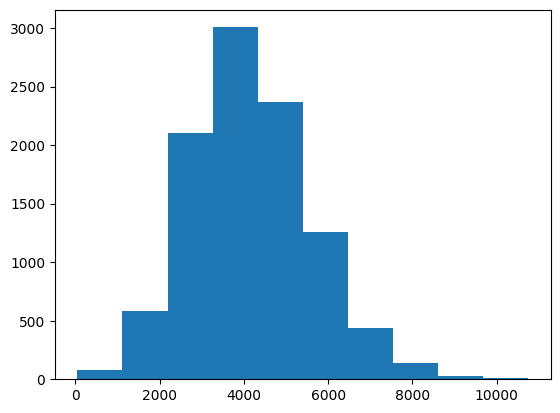

In [12]:
plt.hist(loan_data['loan_amt_outstanding'])

In [21]:
columns = loan_data.columns

(array([4128.,    0., 2590.,    0.,  902.,    0.,  599.,    0.,  484.,
        1297.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

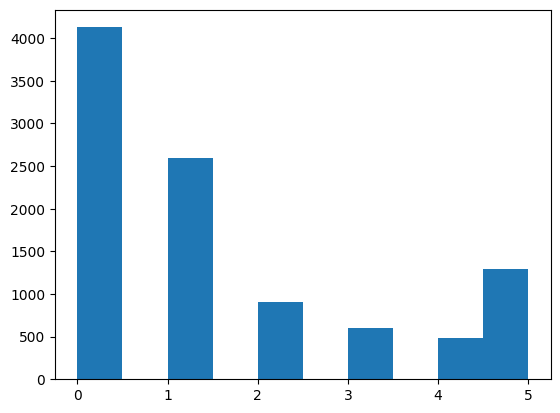

In [14]:
plt.hist(loan_data['credit_lines_outstanding'])

(array([2695., 3749., 1552.,  823.,  578.,  353.,  174.,   55.,   15.,
           6.]),
 array([3.16527316e+01, 4.39736587e+03, 8.76307901e+03, 1.31287921e+04,
        1.74945053e+04, 2.18602184e+04, 2.62259316e+04, 3.05916447e+04,
        3.49573578e+04, 3.93230710e+04, 4.36887841e+04]),
 <BarContainer object of 10 artists>)

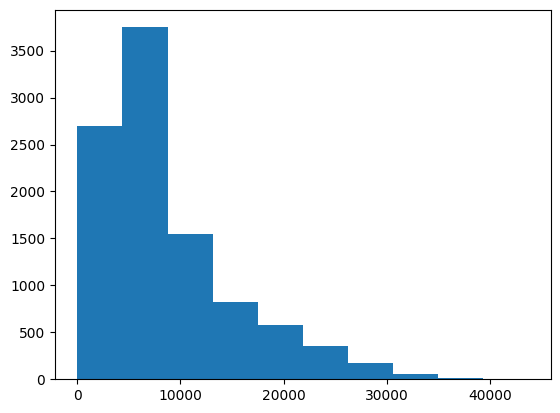

In [16]:
plt.hist(loan_data['total_debt_outstanding'])

(array([  44.,  207.,  813., 2008., 2794., 2495., 1196.,  363.,   71.,
           9.]),
 array([  1000.     ,  15741.21805,  30482.4361 ,  45223.65415,
         59964.8722 ,  74706.09025,  89447.3083 , 104188.52635,
        118929.7444 , 133670.96245, 148412.1805 ]),
 <BarContainer object of 10 artists>)

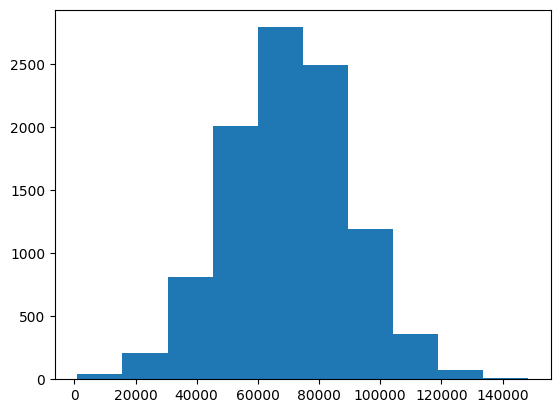

In [17]:
plt.hist(loan_data['income'])

(array([  12.,  117.,  439., 1323., 2458., 2878., 1856.,  732.,  161.,
          24.]),
 array([408. , 452.2, 496.4, 540.6, 584.8, 629. , 673.2, 717.4, 761.6,
        805.8, 850. ]),
 <BarContainer object of 10 artists>)

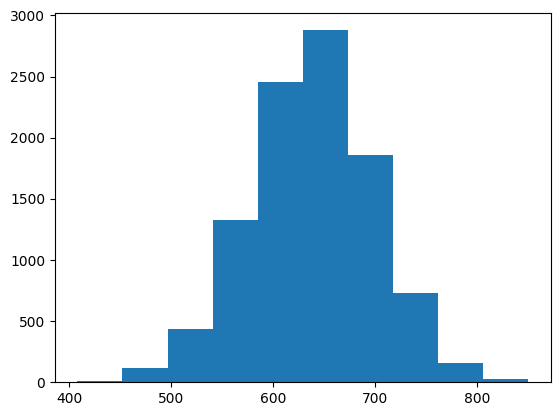

In [18]:
plt.hist(loan_data['fico_score'])

In [24]:
columns = list(columns)
numerical_columns = ['credit_lines_outstanding', 'loan_amt_outstanding', 'income','fico_score']

In [25]:
scaler = StandardScaler()
transform_data = scaler.fit_transform(loan_data[numerical_columns])

In [30]:
transform_data = pd.DataFrame(transform_data, columns=numerical_columns)

In [31]:
categorical_data = loan_data["years_employed"]

In [35]:
concat_data = pd.concat([transform_data,categorical_data], axis="columns")
concat_data

,credit_lines_outstanding,loan_amt_outstanding,income,fico_score,years_employed
0,-0.837960,0.747096,0.398555,-0.536770,5
1,2.029409,-1.548375,-2.161876,-1.080832,2
2,-0.837960,-0.560509,-0.207919,-0.586230,4
3,-0.837960,0.427045,0.215083,-0.421363,5
4,-0.264486,-1.979733,-2.321314,-0.108115,6
...,...,...,...,...,...
9995,-0.837960,-0.792238,-1.362562,0.980009,5
9996,-0.264486,-0.009454,0.494719,-0.371903,8
9997,0.308988,-0.753840,-1.586712,-0.685150,5
9998,-0.837960,-0.612649,-0.952136,0.155673,2


In [37]:
X_train, X_test, y_train, y_test = train_test_split(concat_data, loan_data['default'], test_size=0.25, random_state=16)

In [40]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [41]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2041,    4],
       [  11,  444]])

Text(0.5, 427.9555555555555, 'Predicted label')

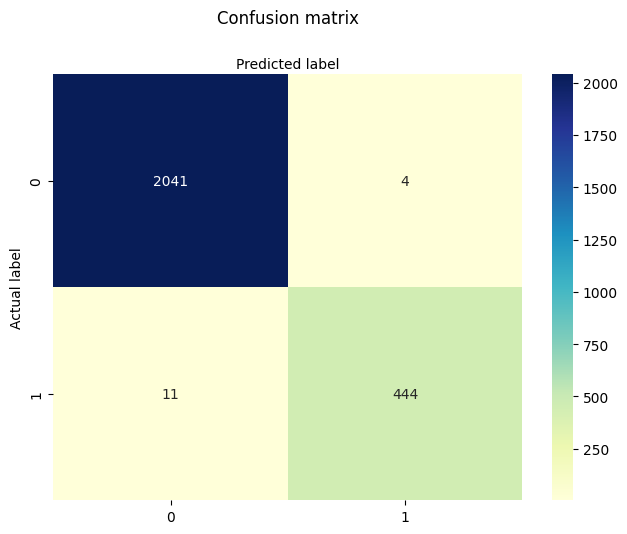

In [45]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')